## Guía de Trabajo: Análisis de Datos con Pandas, Matplotlib y Seaborn

### Introducción:
En esta guía, aprenderemos a utilizar las bibliotecas de Python Pandas, Matplotlib y Seaborn para el análisis exploratorio de datos. Utilizaremos datos artificiales para comprender cómo cargar, limpiar, visualizar y analizar datos utilizando estas poderosas herramientas.

### 1. Instalación de Bibliotecas: Normalmente estas bibliotecas ya se encuetran disponibles en tu entorno
Asegúrate de tener instaladas las siguientes bibliotecas:
```bash
pip install pandas matplotlib seaborn
```

### 2. Importación de Bibliotecas:
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
```


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1: Introducción a Series
**Objetivo:** Aprender a crear y manipular Series en pandas.


1. **Crear una Serie a partir de una lista de Python:**

In [3]:
data = [10, 20, 30, 40, 50]
series = pd.Series(data)
print(series)

0    10
1    20
2    30
3    40
4    50
dtype: int64


2. **Asignar etiquetas (índices) personalizadas a una Serie:**

In [11]:
labels = ['a', 'b', 'c', 'd', 'e']
series = pd.Series(data, index=labels)
print(series)

a    10
b    20
c    30
d    40
e    50
dtype: int64


3. **Acceder a elementos de una Serie:**

In [12]:
print(series['b'])
print(series[1])

20
20


4. **Operaciones básicas en Series:**

In [13]:
print(series * 2)
print(series.mean())
print(series.describe())

a     20
b     40
c     60
d     80
e    100
dtype: int64
30.0
count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
dtype: float64


In [26]:
import pandas as pd

data = ["pedro","pedro","pedro", "marcos", "ricardo", "Teresa", "Camila","Camila","Camila","Camila"]
series = pd.Series(data)
print(series)

0      pedro
1      pedro
2      pedro
3     marcos
4    ricardo
5     Teresa
6     Camila
7     Camila
8     Camila
9     Camila
dtype: object


In [27]:
series.describe()

count         10
unique         5
top       Camila
freq           4
dtype: object


### Ejercicio 2: Introducción a DataFrames
**Objetivo:** Aprender a crear y manipular DataFrames en pandas.


1. **Crear un DataFrame a partir de un diccionario:**

In [4]:
data = {
    'Nombre': ['Ana', 'Juan', 'Pedro', 'María'],
    'Edad': [23, 34, 45, 29],
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Valencia']
}
df = pd.DataFrame(data)
print(df)

  Nombre  Edad     Ciudad
0    Ana    23     Madrid
1   Juan    34  Barcelona
2  Pedro    45    Sevilla
3  María    29   Valencia


2. **Acceder a columnas y filas de un DataFrame:**

In [5]:
print(df['Nombre'])
print(df[['Nombre', 'Ciudad']])
print(df.loc[1])
print(df.iloc[2])

0      Ana
1     Juan
2    Pedro
3    María
Name: Nombre, dtype: object
  Nombre     Ciudad
0    Ana     Madrid
1   Juan  Barcelona
2  Pedro    Sevilla
3  María   Valencia
Nombre         Juan
Edad             34
Ciudad    Barcelona
Name: 1, dtype: object
Nombre      Pedro
Edad           45
Ciudad    Sevilla
Name: 2, dtype: object


In [6]:
s = df["Ciudad"]
s.describe()

count          4
unique         4
top       Madrid
freq           1
Name: Ciudad, dtype: object

In [36]:
df.describe()

,Edad
count,4.000000
mean,32.750000
std,9.322911
min,23.000000
25%,27.500000
50%,31.500000
75%,36.750000
max,45.000000


3. **Añadir y eliminar columnas:**

In [7]:

df['Salario'] = [3000, 4000, 3500, 4500]
print(df)
del df['Salario']
print(df)


  Nombre  Edad     Ciudad  Salario
0    Ana    23     Madrid     3000
1   Juan    34  Barcelona     4000
2  Pedro    45    Sevilla     3500
3  María    29   Valencia     4500
  Nombre  Edad     Ciudad
0    Ana    23     Madrid
1   Juan    34  Barcelona
2  Pedro    45    Sevilla
3  María    29   Valencia


4. **Filtrar datos en un DataFrame:**


In [8]:
print(df[df['Edad'] > 30])

  Nombre  Edad     Ciudad
1   Juan    34  Barcelona
2  Pedro    45    Sevilla


### Ejercicio 3: Carga de Datos desde Archivos
**Objetivo:** Aprender a cargar y guardar datos usando pandas.

1. **Leer datos desde un archivo CSV:**
    ```python
    df = pd.read_csv('ruta/al/archivo.csv')
    print(df.head())
    ```

2. **Guardar datos en un archivo CSV:**
    ```python
    df.to_csv('ruta/al/archivo_guardado.csv', index=False)
    ```





### Generación de Datos Artificiales




In [53]:
import pandas as pd
import numpy as np

# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos
num_samples = 1000
age = np.random.randint(20, 65, size=num_samples)  # Variable numérica
hours_worked_per_week = np.random.randint(20, 60, size=num_samples)  # Variable discreta
job_category = np.random.choice(['Oficina', 'Campo', 'Remoto'], size=num_samples)  # Variable categórica

# Crear DataFrame
data = {
    'Edad': age,
    'HorasTrabajadasPorSemana': hours_worked_per_week,
    'CategoriaTrabajo': job_category
}
df = pd.DataFrame(data)

# Introducir valores faltantes
missing_percentage = 0.03
num_missing = int(num_samples * missing_percentage)

# Crear un índice aleatorio para los valores faltantes
missing_indices = np.random.choice(df.index, num_missing, replace=False)

# Aplicar valores faltantes en todas las variables
for col in df.columns:
    df.loc[missing_indices[:num_missing//3], col] = np.nan

# Introducir valores faltantes en una sola variable en 1% de los registros
missing_percentage_single_var = 0.01
num_missing_single_var = int(num_samples * missing_percentage_single_var)
single_var_missing_indices = np.random.choice(df.index, num_missing_single_var, replace=False)
df.loc[single_var_missing_indices, 'Edad'] = np.nan

# Mostrar los primeros registros del DataFrame
df.head(10)

,Edad,HorasTrabajadasPorSemana,CategoriaTrabajo
0,58.0,33.0,Oficina
1,48.0,45.0,Remoto
2,34.0,23.0,Remoto
3,62.0,44.0,Campo
4,27.0,44.0,Campo
5,40.0,37.0,Campo
6,58.0,59.0,Campo
7,38.0,27.0,Oficina
8,42.0,58.0,Oficina
9,30.0,59.0,Campo


In [40]:
df.tail(10)

,Edad,HorasTrabajadasPorSemana,CategoriaTrabajo
990,30.0,34.0,Campo
991,NaN,23.0,Campo
992,56.0,40.0,Remoto
993,33.0,32.0,Campo
994,49.0,41.0,Oficina
995,54.0,38.0,Remoto
996,40.0,53.0,Campo
997,56.0,33.0,Remoto
998,24.0,23.0,Remoto
999,38.0,46.0,Campo


In [45]:
dfex = pd.read_csv('datos_ex1.csv')
dfex.isnull().sum()

Nombres    0
 Edades    2
 comida    2
dtype: int64

In [54]:
dfex.dropna(inplace=True)
print(dfex)

  Nombres   Edades      comida
0  Carlos     28.0      vegano
1   Maria     30.0       carne
2   Laura     52.0   vegetales
3   Mario     40.0       sopas


### Ejercicio 4: Limpieza de Datos

**Objetivo:** Aprender a manejar datos faltantes y realizar limpieza básica de datos.

1. **Identificar datos faltantes:**
    ```python
    print(df.isnull().sum())
    ```

2. **Rellenar datos faltantes:**
    ```python
    df.fillna(0, inplace=True)
    print(df)
    ```

3. **Eliminar filas/columnas con datos faltantes:**
    ```python
    df.dropna(inplace=True)
    print(df)
    ```



In [41]:
print(df.isnull().sum())

Edad                        20
HorasTrabajadasPorSemana    10
CategoriaTrabajo            10
dtype: int64


In [52]:
df.fillna(0, inplace=True)
df.tail(10)

,Edad,HorasTrabajadasPorSemana,CategoriaTrabajo
990,30.0,34.0,Campo
991,0.0,23.0,Campo
992,56.0,40.0,Remoto
993,33.0,32.0,Campo
994,49.0,41.0,Oficina
995,54.0,38.0,Remoto
996,40.0,53.0,Campo
997,56.0,33.0,Remoto
998,24.0,23.0,Remoto
999,38.0,46.0,Campo


### Ejercicio 5: Agrupamiento y Resumen de Datos

**Objetivo:** Aprender a agrupar datos y obtener resúmenes estadísticos.

1. **Agrupar datos por una columna:**
    ```python
    grouped = df.groupby('CategoriaTrabajo')
    print(grouped.mean())
    ```

2. **Obtener estadísticas descriptivas por grupo:**
    ```python
    print(grouped.describe())
    ```



In [61]:
grouped = df.groupby('CategoriaTrabajo')
print(grouped.mean())

                       Edad  HorasTrabajadasPorSemana
CategoriaTrabajo                                     
Campo             41.653179                 40.427350
Oficina           41.813665                 39.196319
Remoto            42.490385                 40.118211


,Edad,HorasTrabajadasPorSemana
count,980.000000,990.000000
mean,41.972449,39.924242
std,12.907713,11.538186
min,20.000000,20.000000
25%,31.000000,30.000000
50%,43.000000,40.000000
75%,53.000000,50.000000
max,64.000000,59.000000



### Ejercicio 6: Visualización de Datos

**Objetivo:** Aprender a visualizar datos usando pandas y matplotlib.

1. **Visualización básica de un DataFrame:**
    ```python
    import matplotlib.pyplot as plt

    df['Edad'].plot(kind='hist', title='Distribución de Edades')
    plt.show()
    ```

2. **Gráficos de barras y de líneas:**
    ```python
    df.plot(kind='bar', x='CategoriaTrabajo', y='HorasTrabajadasPorSemana', title='Horas Trabajadas por Categoría de Trabajo')
    plt.show()

    df['HorasTrabajadasPorSemana'].plot(kind='line', title='Horas Trabajadas por Semana')
    plt.show()
    ```

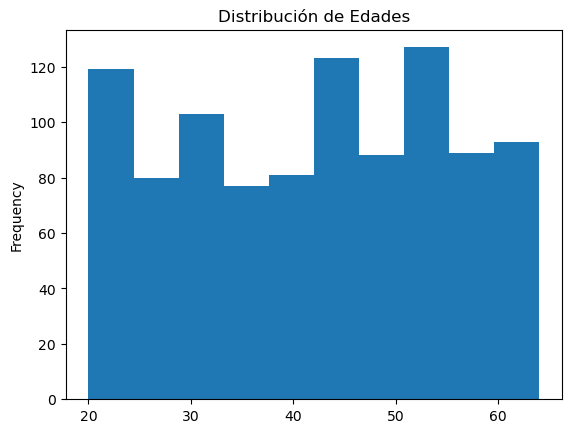

In [64]:
import matplotlib.pyplot as plt
df['Edad'].plot(kind='hist', title='Distribución de Edades')
plt.show()

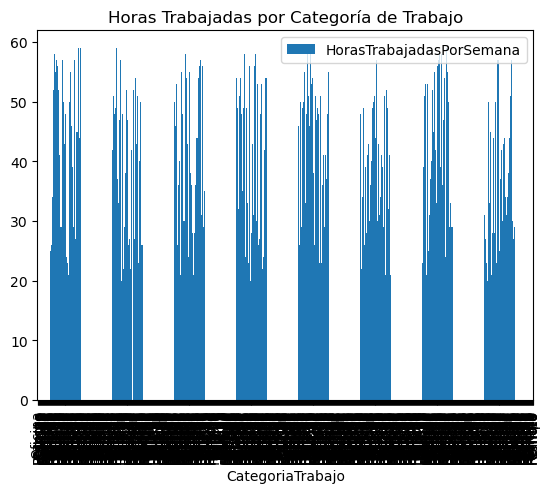

In [65]:
df.plot(kind='bar', x='CategoriaTrabajo', y='HorasTrabajadasPorSemana', title='Horas Trabajadas por Categoría de Trabajo')
plt.show()

###3. Cargar datos: Si trabajamos en colab, también será necesario dar permisos para acceder al google drive

#### paso 1: dar permisos a colab para acceder a nuestro Drive
#### definimos la ruta hasta nuestro drive en la variable `root` para indicar donde se encuentran nuestros archivos
```python
from google.colab import drive
drive.mount('/content/drive')


root = "/content/drive/My Drive/"

```


In [3]:
from google.colab import drive
drive.mount('/content/drive')

root = "/content/drive/My Drive/"

Mounted at /content/drive


### Paso 2: complementar la ruta de nuestro archivo y leerlo usando pandas

primero definimos la ruta a nuestro archivo, debe ser una carpeta en nuestro Drive
```python
archivo = root + "cursopython/artificial.csv"
```
Luego usamos pandas para leer el archivo con los datos
```python
datos= pd.read_csv(archivo)

```
Finalmente mostramos la cabecera de los datos para confirmar que los datos si corresponden.
```python
datos.head()
```

### **Ejercicio** : crear la carpeta `data` en google drive, cargar los datos compartidos en la clase anterior y hacer el proceso para cada uno de ellos mostrando la cabecera de los datos
**nota** : hacer el proceso (ejercicio) en un colab diferente a este

In [5]:
archivo = root + "cursopython/artificial.csv"
datos= pd.read_csv(archivo)
datos.head()

,ID,Age,Income,Children,Education,Marital_Status,Purchase_Amount
0,1,34,56.8,1,Master's,Married,150.23
1,2,23,45.2,0,Bachelor's,Single,78.45
2,3,45,123.6,3,PhD,Married,320.87
3,4,36,76.9,2,Master's,Divorced,189.34
4,5,29,60.0,0,Bachelor's,Single,54.78


### 4. Exploración de Datos:
```python
# Ver las primeras filas del DataFrame
print(datos.head())

# Obtener información sobre el DataFrame
print(datos.info())

# Resumen estadístico de los datos numéricos
print(datos.describe())

# Conteo de valores únicos en una columna
print(datos['Nombre columna'].value_counts())
```


In [23]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               100 non-null    int64  
 1   Age              100 non-null    int64  
 2   Income           100 non-null    float64
 3   Children         100 non-null    int64  
 4   Education        100 non-null    object 
 5   Marital_Status   100 non-null    object 
 6   Purchase_Amount  100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB
None


In [21]:
print(datos.head())

   ID  Age  Income  Children   Education Marital_Status  Purchase_Amount
0   1   34    56.8         1    Master's        Married           150.23
1   2   23    45.2         0  Bachelor's         Single            78.45
2   3   45   123.6         3         PhD        Married           320.87
3   4   36    76.9         2    Master's       Divorced           189.34
4   5   29    60.0         0  Bachelor's         Single            54.78


In [24]:
print(datos['Marital_Status'].value_counts())

Marital_Status
Married     62
Single      29
Divorced     9
Name: count, dtype: int64



### 5. Visualización de Datos con Matplotlib:
```python
# Histograma de la columna 'A'
plt.hist(datos['A'], bins=20)
plt.title('Histograma de A')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()
```


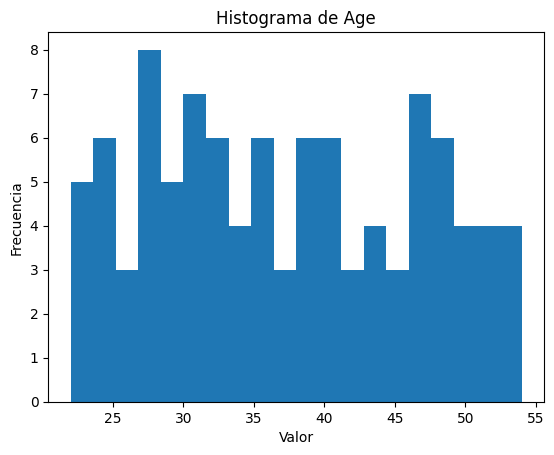

In [6]:
# Histograma de la columna 'Age'
plt.hist(datos['Age'], bins=20)
plt.title('Histograma de Age')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


### 6. Visualización de Datos con Seaborn:
```python
# Gráfico de dispersión de 'A' vs 'B' con Seaborn
sns.scatterplot(x='A', y='B', data=datos)
plt.title('Gráfico de Dispersión de A vs B')
plt.show()

# Boxplot de 'C' vs 'B' con Seaborn
sns.boxplot(x='C', y='B', data=datos)
plt.title('Boxplot de C vs B')
plt.show()
```


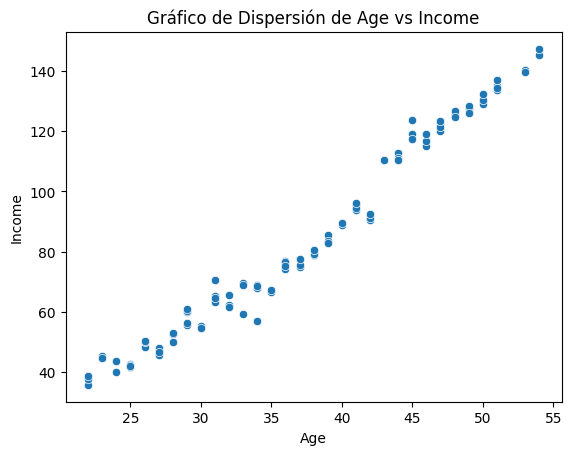

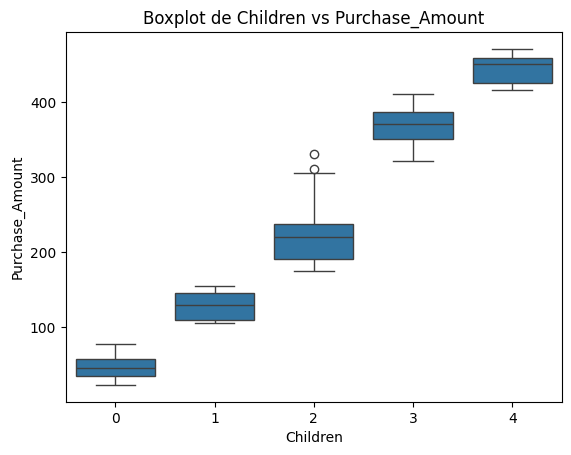

In [7]:
# Gráfico de dispersión de 'Age' vs 'Income' con Seaborn
sns.scatterplot(x='Age', y='Income', data=datos)
plt.title('Gráfico de Dispersión de Age vs Income')
plt.show()

# Boxplot de 'Children' vs 'Purchase_Amount' con Seaborn
sns.boxplot(x='Children', y='Purchase_Amount', data=datos)
plt.title('Boxplot de Children vs Purchase_Amount')
plt.show()


### 7. Limpieza de Datos:
```python
# Eliminar filas con valores NaN
datos_limpio = datos.dropna()

# Eliminar duplicados
datos_limpio = datos.drop_duplicates()

# Corregir nombres de columnas
datos.rename(columns={'A': 'Columna_A', 'B': 'Columna_B'}, inplace=True)
```



### 8. Análisis Adicional:
```python
# Correlación entre columnas numéricas
correlacion = datos.corr()
print(correlacion)

# Mapa de calor de correlación con Seaborn
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()
```


                      Age    Income  Children  Purchase_Amount
Age              1.000000  0.987053  0.968709         0.986530
Income           0.987053  1.000000  0.957517         0.991933
Children         0.968709  0.957517  1.000000         0.972207
Purchase_Amount  0.986530  0.991933  0.972207         1.000000


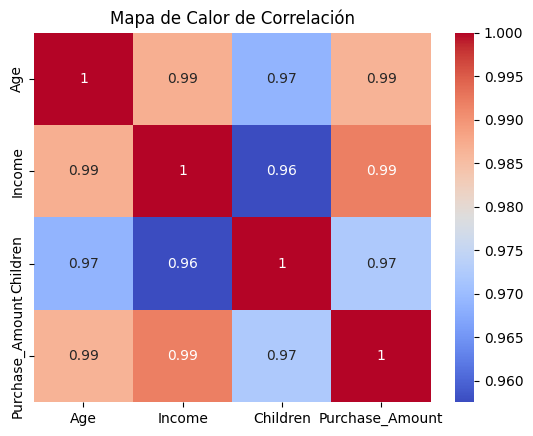

In [8]:
# Correlación entre columnas numéricas
columnas = ['Age',  'Income' , 'Children',   'Purchase_Amount']
correlacion = datos[columnas].corr()
print(correlacion)

# Mapa de calor de correlación con Seaborn
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

## 9. Ejemplos

### Ejemplo jugadores
Supongamos que queremos almacenar información sobre jugadores de futbol guardando el nombre, la posición y el pais de origen. Lo hacemos con un diccionario de la siguiente forma:

In [ ]:
#crear diccionario
jugadores = \
{
        'Nombre': ['Casillas', 'Ramos', 'Ronaldo', 'Messi', 'Neymar', 'Roberto Carlos', 'Falcao', 'James',
                 'David Ospina', 'Valderrama', 'Jorge Bermudez'],
        'Posicion': ['Arquero', 'Defensa', 'Delantero', 'Delantero','Delantero', 'Defensa', 'Delantero',
                        'Medio campo', 'Arquero', 'Medio campo', 'Defensa'],
        'Pais': ['España', 'España', 'Portugal', 'Argentina', 'Brasil', 'Brasil',
                 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia']
    }

#crear data frame
jugadores_df = pd.DataFrame(jugadores
    , columns=['Nombre', 'Posicion', 'Pais'], #index = range(1,12)
)

jugadores_df

,Nombre,Posicion,Pais
0,Casillas,Arquero,España
1,Ramos,Defensa,España
2,Ronaldo,Delantero,Portugal
3,Messi,Delantero,Argentina
4,Neymar,Delantero,Brasil
5,Roberto Carlos,Defensa,Brasil
6,Falcao,Delantero,Colombia
7,James,Medio campo,Colombia
8,David Ospina,Arquero,Colombia
9,Valderrama,Medio campo,Colombia


También podemos cargar los datos desde un archivo, normalmente archivos **csv**

In [9]:
#mis archivos de datos se encuentran almacenados en la carpeta cursopython de mi drive, en su caso reemplazar por la carpeta que corresponda

archivo = root + "cursopython/arqueros.csv"
df= pd.read_csv(archivo)

df.head()

,Nombre,Posicion,Pais
0,Casillas,Arquero,España
1,Ramos,Defensa,España
2,Ronaldo,Delantero,Portugal
3,Messi,Delantero,Argentina
4,Neymar,Delantero,Brasil


In [10]:
#ahora queremos agregar otro jugador:
df.loc[11] = ['Buffon', 'Arquero', 'Italia']
df

,Nombre,Posicion,Pais
0,Casillas,Arquero,España
1,Ramos,Defensa,España
2,Ronaldo,Delantero,Portugal
3,Messi,Delantero,Argentina
4,Neymar,Delantero,Brasil
5,Roberto Carlos,Defensa,Brasil
6,Falcao,Delantero,Colombia
7,James,Medio campo,Colombia
8,David Ospina,Arquero,Colombia
9,Valderrama,Medio campo,Colombia


In [11]:
#agregar nueva columna
df['Estado'] = \
['activo','activo','activo','activo','activo','retirado','activo','activo','activo','retirado','retirado','retirado']
df

,Nombre,Posicion,Pais,Estado
0,Casillas,Arquero,España,activo
1,Ramos,Defensa,España,activo
2,Ronaldo,Delantero,Portugal,activo
3,Messi,Delantero,Argentina,activo
4,Neymar,Delantero,Brasil,activo
5,Roberto Carlos,Defensa,Brasil,retirado
6,Falcao,Delantero,Colombia,activo
7,James,Medio campo,Colombia,activo
8,David Ospina,Arquero,Colombia,activo
9,Valderrama,Medio campo,Colombia,retirado


In [13]:
#filtar datos
df[df['Estado']=='retirado']

,Nombre,Posicion,Pais,Estado
5,Roberto Carlos,Defensa,Brasil,retirado
9,Valderrama,Medio campo,Colombia,retirado
10,Jorge Bermudez,Defensa,Colombia,retirado
11,Buffon,Arquero,Italia,retirado


In [14]:
df[df['Posicion']=='Arquero']

,Nombre,Posicion,Pais,Estado
0,Casillas,Arquero,España,activo
8,David Ospina,Arquero,Colombia,activo
11,Buffon,Arquero,Italia,retirado


<Axes: xlabel='Pais'>

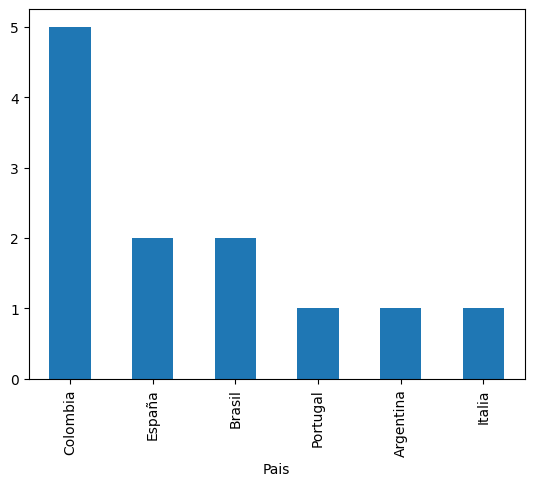

In [16]:
df['Pais'].value_counts().plot.bar()

<Axes: xlabel='Pais'>

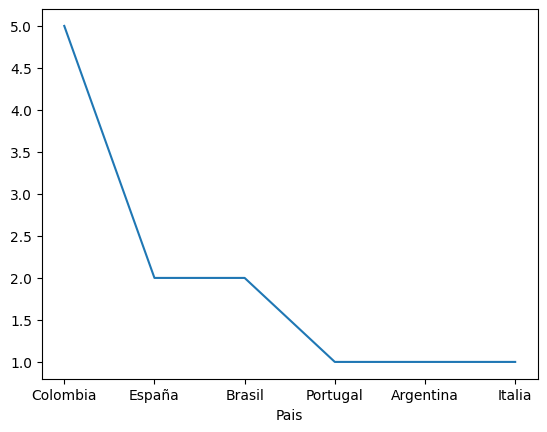

In [17]:
df['Pais'].value_counts().plot()

#### Manipulación de Datos con Pandas

**Descripción**:
Trabajar con un DataFrame de Pandas para realizar operaciones de selección, filtrado y agregación de datos.

**Instrucciones**:
1. Crear un DataFrame con datos ficticios de ventas (ID, Producto, Cantidad, Precio, Fecha).
2. Filtrar las ventas de un producto específico.
3. Calcular el total de ventas por producto.
4. Crear una nueva columna con el valor total de cada venta (Cantidad * Precio).

**Solución**:

```python
import pandas as pd
from datetime import datetime

# Crear un DataFrame
data = {
    'ID': range(1, 11),
    'Producto': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'B', 'C', 'D'],
    'Cantidad': [10, 5, 8, 3, 7, 9, 2, 6, 4, 1],
    'Precio': [100, 200, 150, 300, 200, 150, 400, 200, 300, 400],
    'Fecha': [datetime(2024, 5, i+1) for i in range(10)]
}
df = pd.DataFrame(data)

# Filtrar ventas del producto 'A'
producto_a = df[df['Producto'] == 'A']
print("Ventas del Producto A:")
print(producto_a)

# Calcular el total de ventas por producto
total_ventas = df.groupby('Producto')['Cantidad'].sum()
print("\nTotal de Ventas por Producto:")
print(total_ventas)

# Crear una nueva columna con el valor total de cada venta
df['Total'] = df['Cantidad'] * df['Precio']
print("\nDataFrame con Columna de Total de Venta:")
print(df)
```



#### Visualización de Datos con Matplotlib

**Descripción**:
Visualizar datos utilizando gráficos de línea y de barras.

**Instrucciones**:
1. Crear una serie temporal de datos de ventas mensuales para un año.
2. Graficar las ventas mensuales en un gráfico de línea.
3. Graficar un gráfico de barras mostrando las ventas por trimestre.

**Solución**:

```python
import matplotlib.pyplot as plt

# Datos de ventas mensuales
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ventas_mensuales = [1200, 1500, 1100, 1800, 1600, 1700, 1900, 1750, 1400, 1300, 2000, 2100]

# Gráfico de línea
plt.figure(figsize=(10, 5))
plt.plot(months, ventas_mensuales, marker='o', linestyle='-', color='b')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

# Ventas trimestrales
trimestres = ['Q1', 'Q2', 'Q3', 'Q4']
ventas_trimestrales = [sum(ventas_mensuales[i:i+3]) for i in range(0, 12, 3)]

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(trimestres, ventas_trimestrales, color='g')
plt.title('Ventas Trimestrales')
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.show()
```



#### Análisis Exploratorio de Datos con Seaborn

**Descripción**:
Usar Seaborn para realizar un análisis exploratorio de datos (EDA).

**Instrucciones**:
1. Cargar el conjunto de datos 'tips' de Seaborn.
2. Crear un gráfico de dispersión mostrando la relación entre la propina y el total de la cuenta.
3. Crear un gráfico de caja (boxplot) para comparar la distribución de las propinas entre diferentes días de la semana.

**Solución**:

```python
import seaborn as sns

# Cargar datos
tips = sns.load_dataset('tips')

# Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Propina')
plt.show()

# Gráfico de caja
plt.figure(figsize=(8, 5))
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Distribución de Propinas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Propina')
plt.show()
```

Utilizar Seaborn para ilustrar cómo generar diferentes tipos de gráficos: un histograma, un gráfico de barras y un mapa de calor de correlación.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el entorno para que los gráficos se muestren en el notebook
%matplotlib inline

# Crear datos artificiales
np.random.seed(42)
data = {
    'numerical_col1': np.random.randn(100),
    'numerical_col2': np.random.rand(100) * 100,
    'numerical_col3': np.random.randint(1, 100, 100),
    'categorical_col': np.random.choice(['Category A', 'Category B', 'Category C'], 100)
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
df.head()


,numerical_col1,numerical_col2,numerical_col3,categorical_col
0,0.496714,41.741100,98,Category B
1,-0.138264,22.210781,21,Category C
2,0.647689,11.986537,30,Category B
3,1.523030,33.761517,97,Category C
4,-0.234153,94.290970,28,Category A


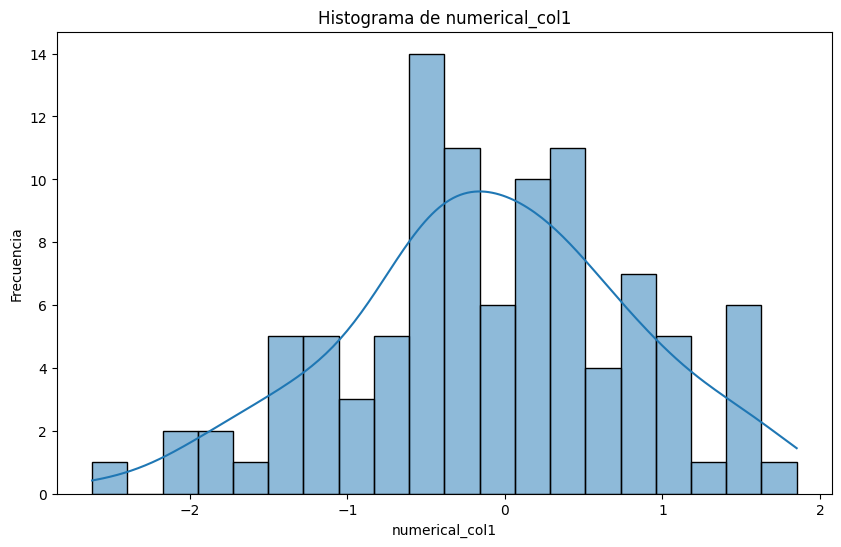

In [ ]:
# Histograma de numerical_col1
plt.figure(figsize=(10, 6))
sns.histplot(df['numerical_col1'], bins=20, kde=True)
plt.title('Histograma de numerical_col1')
plt.xlabel('numerical_col1')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\16079220\AppData\Local\Temp\ipykernel_28740\3939034930.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categorical_col', y='numerical_col2', data=df, ci=None)


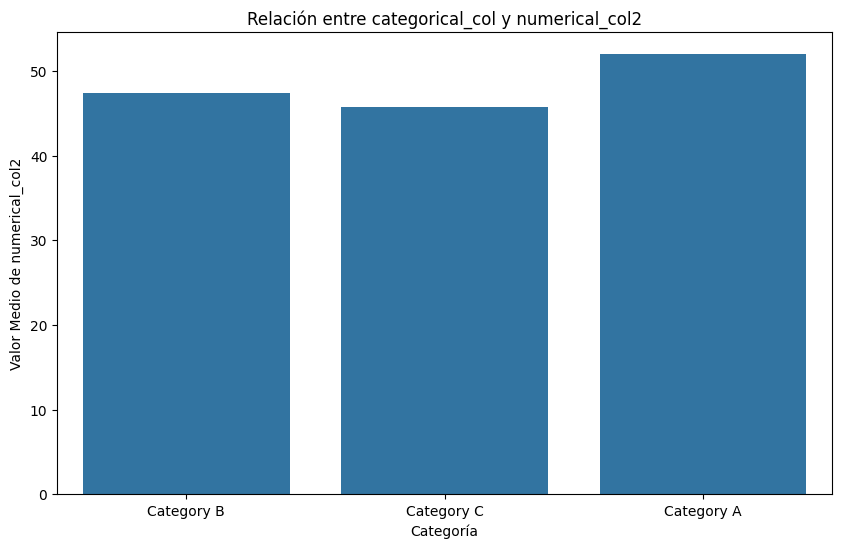

In [ ]:
# Gráfico de barras entre categorical_col y numerical_col2
plt.figure(figsize=(10, 6))
sns.barplot(x='categorical_col', y='numerical_col2', data=df, ci=None)
plt.title('Relación entre categorical_col y numerical_col2')
plt.xlabel('Categoría')
plt.ylabel('Valor Medio de numerical_col2')
plt.show()


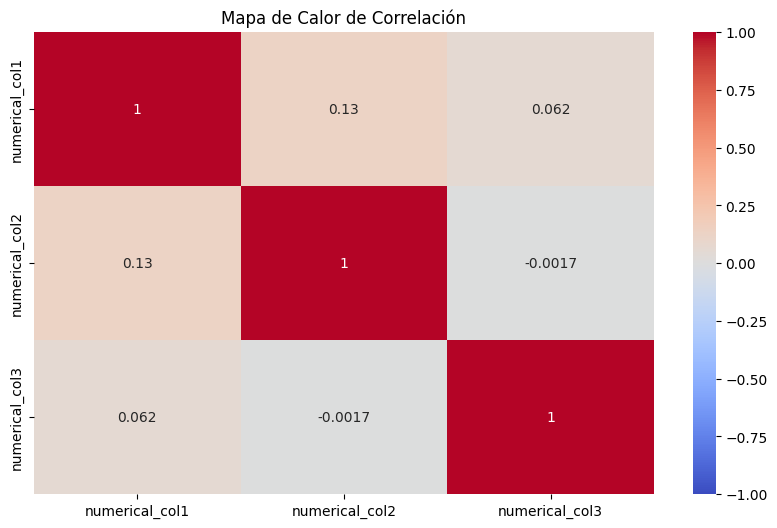

In [ ]:
# Calcular la correlación entre las columnas numéricas
corr = df[['numerical_col1', 'numerical_col2', 'numerical_col3']].corr()

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()
